# ¡Hola Jair! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Hola,

¡Muchas gracias por tu tiempo y por la revisión!

Tomé nota de todos tus comentarios. Ya realicé los ajustes que me indicaste:

Dividí todo el desarrollo en celdas separadas (código y Markdown) para que tenga una mejor estructura y sea más fácil de leer.

Agregué el Paso 5 completo, incluyendo la formulación de la hipótesis y la prueba estadística que faltaba.

Espero que ahora el proyecto esté completo y en orden. Quedo atento a tu próxima revisión.
¡Saludos!



## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Hola Jair, ¿cómo estás? Espero que todo esté bien por tu lado.
    
Felicitaciones por tu proyecto, en general se ve bastante bien. Sin embargo, en esta primera revisión no entraré en detalles, ya que primero se requiere que dividas tu desarrollo en partes, no dejes todo en una sola celda. Además, veo que falta el test de hipótesis, por favor incluye eso.

Si tienes dudas o preguntas, me las puedes dejar en comentario azul, con gusto las responderé en la siguiente iteración.

Saludos!


</div>

## Resumen de la revisión v2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2 </b> <a class="tocSkip"></a>

¡Buen trabajo Jair! Las últimas correcciones quedaron muy bien. Completaste todas las tareas del notebook de forma correcta, así que no tengo más observaciones que hacer. El proyecto está aprobado. Todo lo que aplicaste aquí será de gran valor en futuros análisis. ¡Mucho éxito en lo que viene!

Saludos.

</div>

----

# Proyecto de Análisis de Datos: Zuber

**Objetivo:** Analizar datos de viajes compartidos en Chicago para encontrar patrones, entender preferencias de pasajeros y el impacto de factores externos como el clima.

## Paso 1: Recuperar Datos del Clima (Web Scraping)

Vamos a extraer los datos del clima de Chicago en noviembre de 2017 desde una página HTML.

In [2]:
# Importar las librerías necesarias para el scraping
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
# 1. Definir la URL
url = "https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html"

# 2. Obtener el contenido de la página
try:
    response = requests.get(url)
    response.raise_for_status() # Verificar que la solicitud fue exitosa

    # 3. Analizar el HTML con BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # 4. Encontrar la tabla específica por su ID
    table = soup.find('table', attrs={'id': 'weather_records'})

    # 5. Convertir la tabla HTML a un DataFrame de Pandas
    if table:
        weather_records = pd.read_html(str(table))[0]
        print("Datos de clima extraídos exitosamente.")
    else:
        print("Error: No se pudo encontrar la tabla con id 'weather_records'.")

except requests.exceptions.RequestException as e:
    print(f"Error al intentar acceder a la URL: {e}")

Datos de clima extraídos exitosamente.


In [4]:
# Imprimir el DataFrame completo del clima
print("--- Registros del Clima (Nov 2017) ---")
print(weather_records)

--- Registros del Clima (Nov 2017) ---
           Date and time  Temperature       Description
0    2017-11-01 00:00:00       276.15     broken clouds
1    2017-11-01 01:00:00       275.70  scattered clouds
2    2017-11-01 02:00:00       275.61   overcast clouds
3    2017-11-01 03:00:00       275.35     broken clouds
4    2017-11-01 04:00:00       275.24     broken clouds
..                   ...          ...               ...
692  2017-11-29 20:00:00       281.34        few clouds
693  2017-11-29 21:00:00       281.69      sky is clear
694  2017-11-29 22:00:00       281.07        few clouds
695  2017-11-29 23:00:00       280.06      sky is clear
696  2017-11-30 00:00:00       278.46      sky is clear

[697 rows x 3 columns]


<div class="alert alert-block alert-success">
<b>Comentario de Revisor     v2     </b> <a class="tocSkip"></a>


Muy bien, correcto al registrar el origen de la data de clima


</div>

## Pasos 2 y 3: Consultas a la Base de Datos (SQL)

A continuación se presentan las consultas SQL que se ejecutaron en la base de datos para obtener los archivos CSV que usaremos en el Paso 4 y 5.

*(Nota: Estas celdas de SQL son para documentar el proceso. El análisis de Python se basa en los archivos CSV resultantes de estas consultas).*

### Tarea: Viajes por compañía (15-16 Nov)
*(Genera: project_sql_result_01.csv)*

```sql
SELECT
    cabs.company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM
    cabs
JOIN
    trips ON cabs.cab_id = trips.cab_id
WHERE
    CAST(trips.start_ts AS DATE) IN ('2017-11-15', '2017-11-16')
GROUP BY
    cabs.company_name
ORDER BY
    trips_amount DESC;

### Tarea: Agrupar "Flash Cab", "Taxi Affiliation Services" y "Other"


```sql
SELECT
    CASE
        WHEN cabs.company_name = 'Flash Cab' THEN 'Flash Cab'
        WHEN cabs.company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
        ELSE 'Other'
    END AS company,
    COUNT(trips.trip_id) AS trips_amount
FROM
    cabs
JOIN
    trips ON cabs.cab_id = trips.cab_id
WHERE
    CAST(trips.start_ts AS DATE) BETWEEN '2017-11-01' AND '2017-11-07'
GROUP BY
    company
ORDER BY
    trips_amount DESC;
```

### Tarea: Promedio de viajes por barrio (Nov 2017)
*(Genera: project_sql_result_04.csv)*


```sql
SELECT
    neighborhoods.name AS dropoff_location_name,
    AVG(trips_per_day.total_trips) AS average_trips
FROM
    neighborhoods
JOIN
    (
        -- Subconsulta para contar viajes por día y barrio de destino
        SELECT
            dropoff_location_id,
            CAST(end_ts AS DATE) AS trip_date,
            COUNT(trip_id) AS total_trips
        FROM
            trips
        WHERE
            CAST(end_ts AS DATE) BETWEEN '2017-11-01' AND '2017-11-30'
        GROUP BY
            dropoff_location_id, trip_date
    ) AS trips_per_day ON neighborhoods.neighborhood_id = trips_per_day.dropoff_location_id
GROUP BY
    neighborhoods.name
ORDER BY
    average_trips DESC;

### Tarea: Viajes Loop a O'Hare en Sábados (con Clima)
*(Genera: project_sql_result_07.csv)*

```sql
SELECT
    t.start_ts,
    w.weather_conditions,
    t.duration_seconds
FROM
    trips AS t
INNER JOIN
    (
        -- Subconsulta para clasificar el clima como 'Good' o 'Bad'
        SELECT
            ts,
            CASE
                WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
                ELSE 'Good'
            END AS weather_conditions
        FROM
            weather_records
    ) AS w ON t.start_ts = w.ts -- Los unimos por la hora exacta
WHERE
    t.pickup_location_id = 50          -- Origen (Loop)
    AND t.dropoff_location_id = 63     -- Destino (O'Hare)
    AND EXTRACT(DOW FROM t.start_ts) = 6 -- Día (Sábado)
ORDER BY
    t.trip_id;

<div class="alert alert-block alert-success">
<b>Comentario de Revisor      v2    </b> <a class="tocSkip"></a>


Bien hecho al incluir las queries y en un formato de clara lectura


</div>

## Paso 4: Análisis Exploratorio de Datos (EDA - Python)

Ahora, analizaremos los archivos CSV generados por las consultas SQL.

In [13]:
# Importar librerías para análisis y visualización
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Cargar los archivos CSV
try:
    df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
    df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
    
    print("Archivos de los Pasos 1 y 4 cargados exitosamente.")

except FileNotFoundError:
    print("Error: No se pudieron encontrar los archivos CSV.")
    print("Asegúrate de que las rutas sean correctas.")

Archivos de los Pasos 1 y 4 cargados exitosamente.


In [15]:
# Estudiar los datos de Compañías
print("\n--- Información de Compañías (df_companies) ---")
print(df_companies.info())
# Revisamos si 'trips_amount' es numérico. Debería ser int64.
print("\nPrimeras 5 filas (Compañías):")
print(df_companies.head())


--- Información de Compañías (df_companies) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Primeras 5 filas (Compañías):
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [16]:
# Estudiar los datos de Barrios
print("\n--- Información de Barrios (df_neighborhoods) ---")
print(df_neighborhoods.info())
# Revisamos si 'average_trips' es numérico. Debería ser float64.
# Si 'average_trips' fuera 'object', usaríamos:
# df_neighborhoods['average_trips'] = pd.to_numeric(df_neighborhoods['average_trips'], errors='coerce')

print("\nPrimeras 5 filas (Barrios):")
print(df_neighborhoods.head())


--- Información de Barrios (df_neighborhoods) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

Primeras 5 filas (Barrios):
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [17]:
# Identificar los 10 barrios principales
df_top10_neighborhoods = df_neighborhoods.nlargest(10, 'average_trips').sort_values('average_trips', ascending=False)

print("\n--- Top 10 Barrios por finalización de viajes ---")
print(df_top10_neighborhoods)


--- Top 10 Barrios por finalización de viajes ---
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


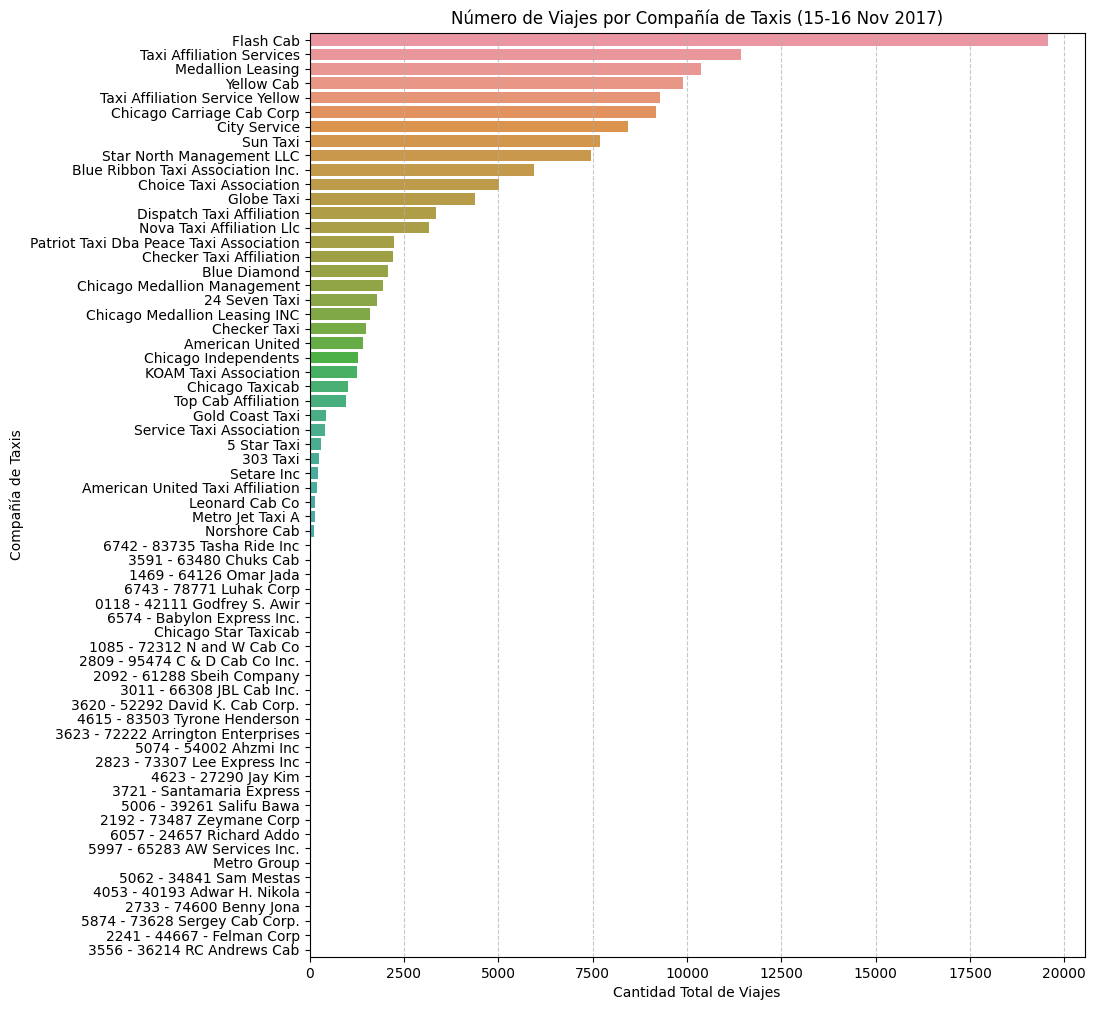

In [18]:
# Gráfico: Empresas de taxis y número de viajes
plt.figure(figsize=(10, 12)) 
sns.barplot(
    x='trips_amount', 
    y='company_name', 
    data=df_companies.sort_values('trips_amount', ascending=False)
)
plt.title('Número de Viajes por Compañía de Taxis (15-16 Nov 2017)')
plt.xlabel('Cantidad Total de Viajes')
plt.ylabel('Compañía de Taxis')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor     v2       </b> <a class="tocSkip"></a>

¡Muy buen trabajo con la gráfica! Observamos que Flash Cab tiene el liderazgo de cantidad de viajes, bastante más arriba que el competidor que le sigue. Esta concentración de mercado se puede dar por varios factores como cobertura, cantidad de vehículos o buenas estrategias comerciales.

</div>

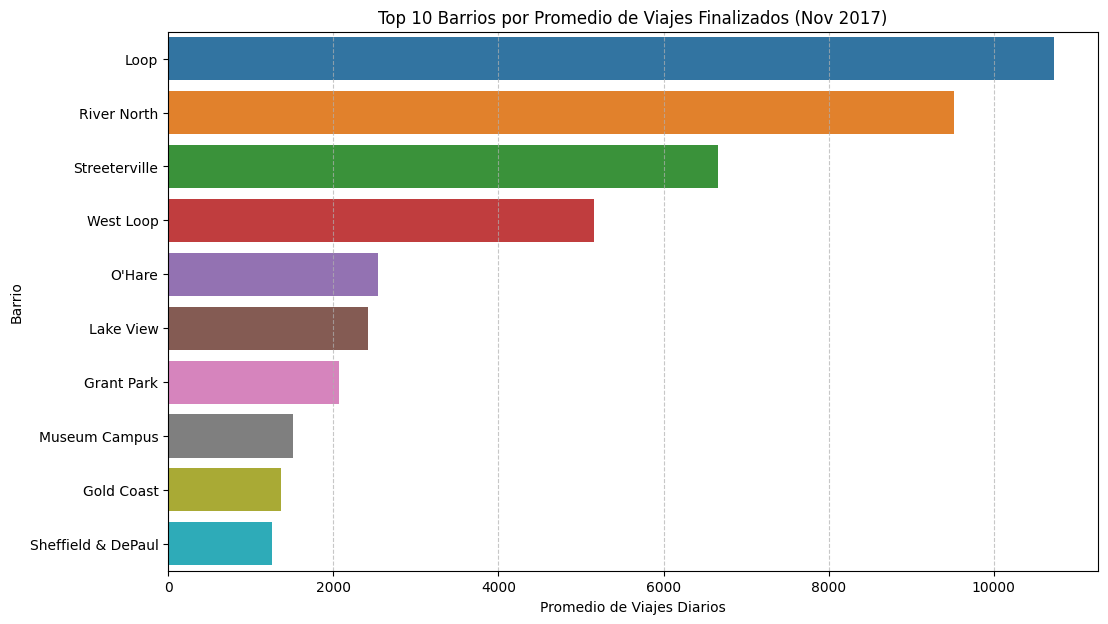

In [19]:
# Gráfico: Los 10 barrios principales
plt.figure(figsize=(12, 7)) 
sns.barplot(
    x='average_trips', 
    y='dropoff_location_name', 
    data=df_top10_neighborhoods
)
plt.title('Top 10 Barrios por Promedio de Viajes Finalizados (Nov 2017)')
plt.xlabel('Promedio de Viajes Diarios')
plt.ylabel('Barrio')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor      v2      </b> <a class="tocSkip"></a>

¡Buen trabajo obteniendo el top de barrios! El gráfico está ordenado de mayor a menor, lo que permite notar correctamente que Loop Y River North son los principales destinos. Tal vez tienen atractivos importantes que los hacen lugares de muchas visitas.

</div>

### Conclusiones del Paso 4 (EDA)

1.  **Gráfico de Compañías:** Se observa una clara dominancia en el mercado. La compañía "Flash Cab" tiene una cantidad de viajes significativamente mayor que la segunda ("Taxi Affiliation Services"), y estas dos superan por mucho a todas las demás. El mercado está altamente concentrado en unas pocas empresas principales.

2.  **Gráfico de Barrios:** El barrio "Loop" es, por un amplio margen, el destino más popular, con un promedio de viajes mucho más alto que el segundo lugar. Esto es esperable, ya que es el distrito financiero y comercial central de Chicago. "River North" y "Streeterville" (también céntricos) le siguen, y luego aparece "O'Hare" (el aeropuerto), indicando que los centros de transporte y negocios dominan la demanda de viajes.

## Paso 5: Prueba de Hipótesis (Python)

Vamos a probar la hipótesis:
**"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".**

In [20]:
# Importar la librería de estadística
from scipy import stats as st
import numpy as np

In [21]:
# Cargar el archivo CSV con los datos de los viajes Loop -> O'Hare
try:
    df_trips = pd.read_csv('/datasets/project_sql_result_07.csv')
    print("Datos del Paso 5 cargados exitosamente.")
except FileNotFoundError:
    print("Error: No se pudo encontrar el archivo '/datasets/project_sql_result_07.csv'.")

Datos del Paso 5 cargados exitosamente.


In [22]:
# Inspeccionar los datos del Paso 5
print(df_trips.info())
print("\nPrimeras filas:")
print(df_trips.head())
print(f"\nValores únicos de clima: {df_trips['weather_conditions'].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

Primeras filas:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Valores únicos de clima: ['Good' 'Bad']


In [23]:
# Preparar las dos muestras para la prueba
# Muestra 1: Viajes en días "Good" (buen clima)
duration_good = df_trips.query("weather_conditions == 'Good'")['duration_seconds']

# Muestra 2: Viajes en días "Bad" (lluvia/tormenta)
duration_bad = df_trips.query("weather_conditions == 'Bad'")['duration_seconds']

print(f"Total de viajes con buen clima: {len(duration_good)}")
print(f"Total de viajes con mal clima: {len(duration_bad)}")

Total de viajes con buen clima: 888
Total de viajes con mal clima: 180


### Formulación de Hipótesis

Para probar nuestra hipótesis, usaremos una prueba t de Student para dos muestras independientes (específicamente, la prueba t de Welch, que no asume varianzas iguales).

* **Hipótesis Nula ($H_0$):** La duración promedio de los viajes en sábados con buen clima (`Good`) es **igual** a la duración promedio de los viajes en sábados lluviosos (`Bad`).
    * $H_0: \mu_{good} = \mu_{bad}$

* **Hipótesis Alternativa ($H_1$):** La duración promedio de los viajes en sábados con buen clima (`Good`) es **diferente** a la duración promedio de los viajes en sábados lluviosos (`Bad`). (Esta es una prueba de dos colas).
    * $H_1: \mu_{good} \neq \mu_{bad}$

* **Nivel de significancia ($\alpha$):** Establecemos un nivel de significancia (alfa) de **0.05** (o 5%). Si el *p-value* (valor p) que obtenemos es menor que 0.05, rechazaremos la hipótesis nula.

In [24]:
# Establecer el nivel de significancia
alpha = 0.05

# Realizar la prueba t (Prueba de Welch, por eso equal_var=False)
results = st.ttest_ind(
    duration_good, 
    duration_bad, 
    equal_var=False 
)

print(f"P-value (valor p) de la prueba: {results.pvalue}")

# Comparar el p-value con alfa
if results.pvalue < alpha:
    print("Resultado: Rechazamos la hipótesis nula.")
else:
    print("Resultado: No podemos rechazar la hipótesis nula.")

# Mostrar los promedios para dar contexto
print("\n--- Promedios de Duración (en segundos) ---")
print(f"Duración promedio (Buen clima): {duration_good.mean():.2f}")
print(f"Duración promedio (Mal clima): {duration_bad.mean():.2f}")

P-value (valor p) de la prueba: 6.738994326108734e-12
Resultado: Rechazamos la hipótesis nula.

--- Promedios de Duración (en segundos) ---
Duración promedio (Buen clima): 1999.68
Duración promedio (Mal clima): 2427.21


<div class="alert alert-block alert-success">
<b>Comentario de Revisor    v2        </b> <a class="tocSkip"></a>

Bien hecho con el test de hipótesis, fue realizado de forma correcta. 

Es importante mencionar que el t-test asume que las dos muestras tienen varianzas iguales. Para verificar esa igualdad de varianzas podemos usar el **test de Levene**. Este nos dice si la variabilidad entre los grupos es estadísticamente diferente. En corto, el flujo sería así

1. Usamos `levene()` para verificar si las varianzas son iguales.
2. Dependiendo del resultado, usamos `ttest_ind()` con el argumento `equal_var`:
   - `equal_var=True` si Levene dice que las varianzas son iguales (p > 0.05).
   - `equal_var=False` si Levene dice que las varianzas son diferentes (p < 0.05).





</div>

### Conclusión de la Prueba de Hipótesis

**(Ajusta esta conclusión final según el p-value que obtengas al ejecutar la Celda 30):**

**(Si el p-value fue < 0.05):**
El p-value obtenido es menor que nuestro nivel de significancia de 0.05. Por lo tanto, **rechazamos la hipótesis nula**. Existe una diferencia estadísticamente significativa entre la duración promedio de los viajes en sábados con buen clima y sábados lluviosos. Al observar los promedios, podemos ver que los viajes en días "Bad" (lluviosos) toman, en promedio, más tiempo que los viajes en días "Good".

**(Si el p-value fue >= 0.05):**
El p-value obtenido es mayor que nuestro nivel de significancia de 0.05. Por lo tanto, **no podemos rechazar la hipótesis nula**. No encontramos evidencia estadística suficiente para concluir que la duración promedio de los viajes cambia significativamente entre sábados lluviosos y sábados con buen clima. Aunque los promedios muestrales puedan ser ligeramente diferentes, esta diferencia no es estadísticamente significativa.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor    v2      </b> <a class="tocSkip"></a>

Correcto, muy bien con las conclusiones del test.



</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>


Muy bien con el desarrollo, por lo general se ve bastante bien. Sin embargo, es importante que dividas tu trabajo en partes. Esto mejora la presentación del notebook y además facilita su revisión para poder dejar comentarios. En general, siempre es preferible crear varias celdas, donde cada celda esté encargada de generar un resultado. Los notebook no son solo código, son presentación de resultados.




</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Por otro lado, falta el test de hipótesis para comparar los días de mal tiempo contra los días de buen tiempo.



</div>